In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import os

dataset_path = "/content/drive/MyDrive/Colab Notebooks/animal_dataset"
classes = os.listdir(dataset_path)


In [3]:
for folder in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, folder)
    if os.path.isdir(class_path):
        print(folder, ":", len(os.listdir(class_path)), "images")

cat : 100 images
panda : 100 images
dog : 100 images


In [4]:
import os

dataset_path = "/content/drive/MyDrive/Colab Notebooks/animal_dataset"
cat_path = os.path.join(dataset_path, "cat")

print("Files in 'cat' folder:")
print(os.listdir(cat_path))


Files in 'cat' folder:
['cats_00021.jpg', 'cats_00066.jpg', 'cats_00012.jpg', 'cats_00079.jpg', 'cats_00071.jpg', 'cats_00077.jpg', 'cats_00087.jpg', 'cats_00054.jpg', 'cats_00016.jpg', 'cats_00074.jpg', 'cats_00045.jpg', 'cats_00061.jpg', 'cats_00078.jpg', 'cats_00039.jpg', 'cats_00083.jpg', 'cats_00063.jpg', 'cats_00052.jpg', 'cats_00058.jpg', 'cats_00073.jpg', 'cats_00033.jpg', 'cats_00057.jpg', 'cats_00038.jpg', 'cats_00050.jpg', 'cats_00096.jpg', 'cats_00037.jpg', 'cats_00010.jpg', 'cats_00081.jpg', 'cats_00084.jpg', 'cats_00046.jpg', 'cats_00047.jpg', 'cats_00006.jpg', 'cats_00027.jpg', 'cats_00004.jpg', 'cats_00088.jpg', 'cats_00022.jpg', 'cats_00055.jpg', 'cats_00032.jpg', 'cats_00008.jpg', 'cats_00075.jpg', 'cats_00042.jpg', 'cats_00094.jpg', 'cats_00026.jpg', 'cats_00080.jpg', 'cats_00067.jpg', 'cats_00098.jpg', 'cats_00043.jpg', 'cats_00036.jpg', 'cats_00031.jpg', 'cats_00059.jpg', 'cats_00014.jpg', 'cats_00003.jpg', 'cats_00072.jpg', 'cats_00017.jpg', 'cats_00030.jpg', 'cat

**Load a single image safely**

In [5]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize

img_name = os.listdir(cat_path)[0]
img_path = os.path.join(cat_path, img_name)
img = imread(img_path)
print("Original shape:", img.shape)

if len(img.shape) == 3 and img.shape[2] == 3:
    gray = rgb2gray(img)
else:
    gray = img

gray_resized = resize(gray, (32, 32), anti_aliasing=True)
print("Resized shape:", gray_resized.shape)


Original shape: (499, 261, 3)
Resized shape: (32, 32)


**Load a single image safely**

Original shape: (499, 261, 3)
Resized shape: (32, 32)


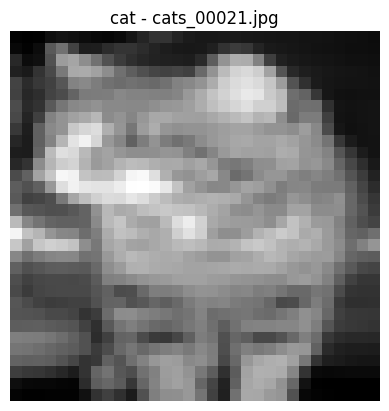

In [6]:
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.transform import resize

cls = classes[0]
cls_path = os.path.join(dataset_path, cls)
img_name = os.listdir(cls_path)[0]
img_path = os.path.join(cls_path, img_name)

img = imread(img_path)
print("Original shape:", img.shape)

if len(img.shape) == 3 and img.shape[2] == 3:
    gray = rgb2gray(img)
else:
    gray = img

gray_resized = resize(gray, (32, 32), anti_aliasing=True)
print("Resized shape:", gray_resized.shape)

import matplotlib.pyplot as plt
plt.imshow(gray_resized, cmap='gray')
plt.title(f"{cls} - {img_name}")
plt.axis('off')
plt.show()


**Load All Images**

In [7]:
import numpy as np

X = []
y = []

img_size = (32, 32)

for label, cls in enumerate(classes):
    cls_path = os.path.join(dataset_path, cls)
    file_list = os.listdir(cls_path)
    print(f"Loading {len(file_list)} images from class '{cls}'")

    for img_name in file_list:
        img_path = os.path.join(cls_path, img_name)
        try:
            img = imread(img_path)
        except:
            print(f"Could not read {img_path}")
            continue

        if len(img.shape) == 3 and img.shape[2] == 3:
            gray = rgb2gray(img)
        else:
            gray = img

        gray_resized = resize(gray, img_size, anti_aliasing=True)

        X.append(gray_resized.flatten())
        y.append(label)

X = np.array(X)
y = np.array(y)

print("Dataset shape:", X.shape)
print("Labels shape:", y.shape)


Loading 100 images from class 'cat'
Loading 100 images from class 'panda'
Loading 100 images from class 'dog'
Dataset shape: (300, 1024)
Labels shape: (300,)


**KNN + 5-Fold CV**

In [8]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier

k_values = [1, 3, 5, 7, 9]
distances = ['manhattan', 'euclidean']
results = {dist: [] for dist in distances}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for dist in distances:
    avg_accuracies = []
    for k in k_values:
        fold_accuracies = []
        for train_idx, val_idx in kf.split(X):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]

            knn = KNeighborsClassifier(n_neighbors=k, metric=dist)
            knn.fit(X_train, y_train)
            acc = knn.score(X_val, y_val)
            fold_accuracies.append(acc)

        avg_accuracies.append(np.mean(fold_accuracies))
    results[dist] = avg_accuracies

print("Average accuracies for Manhattan (L1):", results['manhattan'])
print("Average accuracies for Euclidean (L2):", results['euclidean'])


Average accuracies for Manhattan (L1): [np.float64(0.35333333333333333), np.float64(0.4066666666666666), np.float64(0.42000000000000004), np.float64(0.45666666666666667), np.float64(0.45666666666666667)]
Average accuracies for Euclidean (L2): [np.float64(0.3566666666666667), np.float64(0.36), np.float64(0.3866666666666667), np.float64(0.43000000000000005), np.float64(0.44000000000000006)]


**Plot Accuracy vs K**

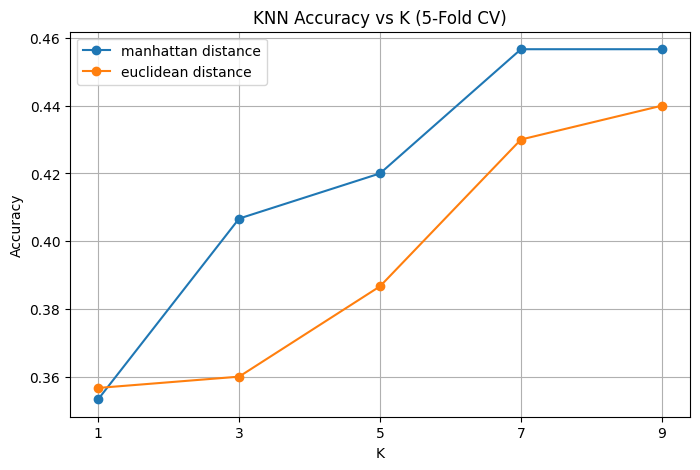

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
for dist in distances:
    plt.plot(k_values, results[dist], marker='o', label=f"{dist} distance")
plt.title("KNN Accuracy vs K (5-Fold CV)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.xticks(k_values)
plt.legend()
plt.grid(True)
plt.show()


**Top 5 Predictions (Visual)**

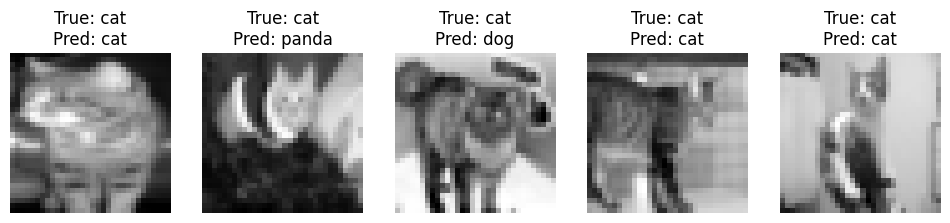

In [10]:
import matplotlib.pyplot as plt

k_final = 3
knn_final = KNeighborsClassifier(n_neighbors=k_final, metric='euclidean')
knn_final.fit(X, y)

top5_indices = [0, 1, 2, 3, 4]
X_top5 = X[top5_indices]
y_top5_true = y[top5_indices]
y_top5_pred = knn_final.predict(X_top5)

plt.figure(figsize=(12, 3))
for i, idx in enumerate(top5_indices):
    img_2d = X[idx].reshape(32, 32)
    plt.subplot(1, 5, i+1)
    plt.imshow(img_2d, cmap='gray')
    plt.title(f"True: {classes[y[idx]]}\nPred: {classes[y_top5_pred[i]]}")
    plt.axis('off')
plt.show()
